# Inspecting the Detected Bounding Boxes

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

In [2]:
image_dir = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/CelebA/CelebA_original"
bbox_csv_path = "/home/stud/m/mc085/mounted_home/dinov2/dinov2/data/datasets/CelebA/list_bbox_celeba_mtcnn.csv"

bbox_df = pd.read_csv(bbox_csv_path)

In [3]:
def display_image_with_bbox(image_id: str):
    image_path = os.path.join(image_dir, image_id)
    img = Image.open(image_path)

    bbox = bbox_df[bbox_df["image_id"] == image_id]
    if bbox.empty:
        print(f"No bounding box found for {image_id}")
        return

    x, y, width, height = bbox.iloc[0][["x_1", "y_1", "width", "height"]]

    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)
    rect = patches.Rectangle(
        (x, y), width, height, linewidth=2, edgecolor="r", facecolor="none"
    )
    ax.add_patch(rect)
    ax.set_title(f"Image: {image_id}")
    plt.axis("off")
    plt.show()

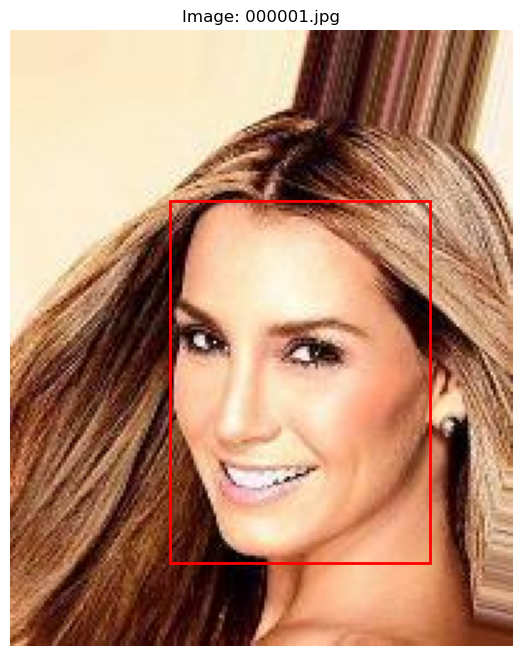

In [11]:
example_image_id = bbox_df["image_id"].iloc[0]
display_image_with_bbox(example_image_id)